In [73]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from importlib import reload 

#add simulator to a path
sys.path.append('Simulator/')


import estimation_methods as em
import noise_models as nm
import utils as utl  
import simulation as sm
import analyser as anl

%load_ext autoreload
%autoreload 2   


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
nois = nm.Over_f_noise(n_fluctuators=5, S1=0.01 ,couplings_dispersion =1e-9, ommax = 1/10, ommin=1/10000)
tcs = [(ou.tc, ou.sigma) for ou in nois.fluctuators]


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

/Users/krzywdaja/Documents/obsedian_test/Brain2/Science/Projects/overf-noise-extrapolation/Simulator/noise_models.py:262: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x)+c


In [96]:
# generate trajectory
N = 100000
y = []
for k in range(N):
    y.append(nois.update(1))

In [97]:
#compute correlation function
W = 1000
C = []
y = np.array(y)
for k in range(W):
    if k==0:
        C.append(np.sum(y*y)/len(y))
    else:
        C.append(np.sum(y[k:]*y[:-k])/len(y[k:]))


def corr_ou(t, tc, sigma):
    return sigma**2*np.exp(-t/tc)


(0.01, 1)

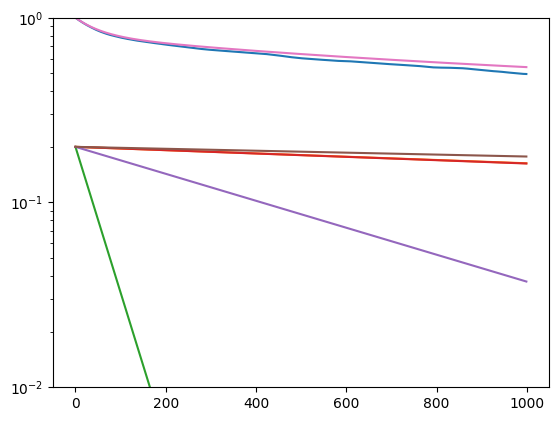

In [98]:
times = np.linspace(0, W-1,W)
plt.plot(times,C/np.max(C))
for k in range(len(tcs)):
    plt.plot(times, corr_ou(times, tcs[k][0], tcs[k][1])/np.max(np.sum(
    [corr_ou(times, tc, sigma) for tc, sigma in tcs], axis=0)))
plt.plot(times, np.sum([corr_ou(times, tc, sigma) for tc, sigma in tcs], axis=0)/np.max(np.sum(
    [corr_ou(times, tc, sigma) for tc, sigma in tcs], axis=0))) 
plt.yscale("log")  
plt.ylim(1e-2,1) 
